In [1]:
import CorrelationFunctions.Utilities as U
import CorrelationFunctions.Directional as D
using PyPlot
using NPZ
using Quaternions
using LinearAlgebra

In [2]:
data = npzread("sample.npy");

# Isosceles triangle pattern

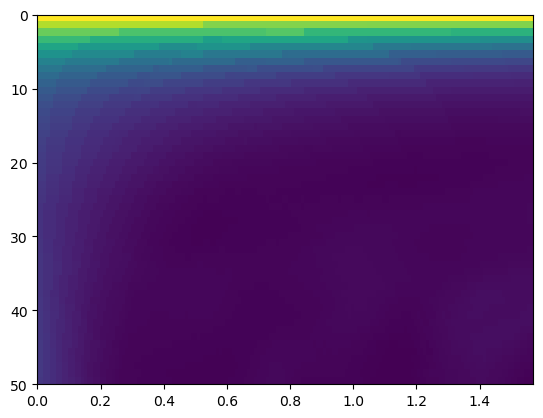

PyObject <matplotlib.image.AxesImage object at 0x23eb79d5f760>

In [7]:
# Isosceles triangle which is defined by a length r of two equal edges and an angle ϕ between them
isosceles_point1(r, ϕ) = (r,        0,        0)
isosceles_point2(r, ϕ) = (r*cos(ϕ), r*sin(ϕ), 0)

# The first point of the triangle is (0, 0, 0), the other two points are elements of arrays ps1 and ps2
ps1 = [round.(Int, isosceles_point1(r, ϕ)) for r in 0:50, ϕ in 0:0.01:π/2]
ps2 = [round.(Int, isosceles_point2(r, ϕ)) for r in 0:50, ϕ in 0:0.01:π/2]

s3_isosceles = D.s3(data, 0, ps1, ps2; mode = U.NonPeriodic())
imshow(s3_isosceles, extent = (0, π/2, 50, 0), aspect = "auto")

# Equilateral triangle

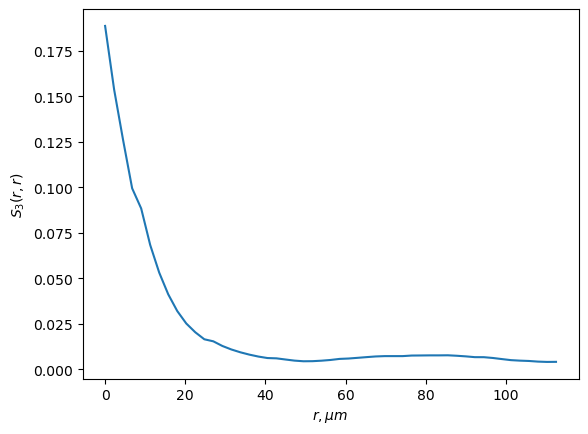

PyObject Text(27.39999999999999, 0.5, '$S_3(r,r)$')

In [8]:
a = sqrt(3)/2
equilateral_point1(r) = (r,     0, 0)
equilateral_point2(r) = (r/2, a*r, 0)

ps1 = [round.(Int, equilateral_point1(r)) for r in 0:50]
ps2 = [round.(Int, equilateral_point2(r)) for r in 0:50]

xs = 2.25*(0:50)
s3_equilateral = D.s3(data, 0, ps1, ps2; mode = U.NonPeriodic())
plot(xs, s3_equilateral)
xlabel(L"$r, \mu m$")
ylabel(L"$S_3(r,r)$")

# Equilateral triangle (average over random rotations)

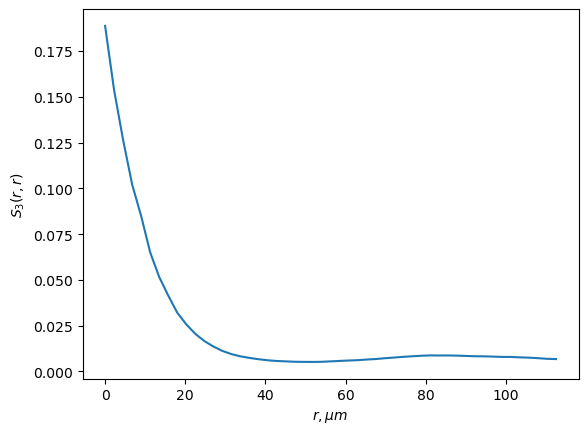

PyObject Text(27.39999999999999, 0.5, '$S_3(r,r)$')

In [11]:
function rotate(q, v)
    q2 = Quaternion(0, v...)
    r = q * q2 * conj(q)
    res = (r.v1, r.v2, r.v3)
    return round.(Int, res)
end

function rotated_equilateral_triangle()
    a = sqrt(3)/2
    rot_vector = normalize(rand(Float64, 3))
    rot_angle  = π*rand(Float64)
    q = Quaternion(cos(rot_angle), (sin(rot_angle)*rot_vector)...)

    ps1 = [(r, 0, 0) for r in 0:50]
    ps2 = [(r/2, a*r, 0) for r in 0:50]

    ps1rot = rotate.(q, ps1)
    ps2rot = rotate.(q, ps2)

    return ps1rot, ps2rot
end

s3_equilateral_avg = mapreduce(+, 1:20) do _
    ps1, ps2 = rotated_equilateral_triangle()
    D.s3(data, 0, ps1, ps2; mode = U.NonPeriodic())
end / 20

xs = 2.25*(0:50)
plot(xs, s3_equilateral_avg)
xlabel(L"$r, \mu m$")
ylabel(L"$S_3(r,r)$")

# Comparison of $S_3$ function, evaluated using different patterns

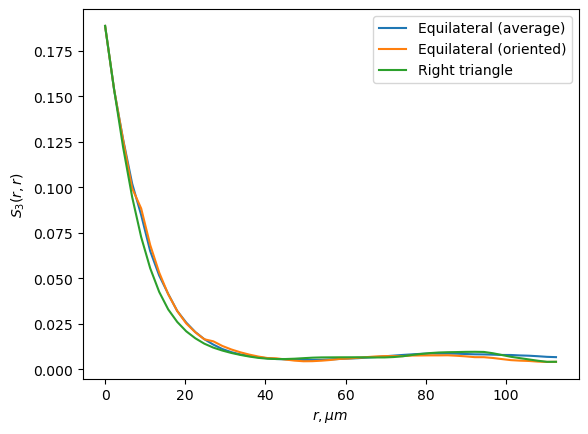

PyObject Text(27.39999999999999, 0.5, '$S_3(r,r)$')

In [14]:
# s3_right_triangle is evaluated using triangle pattern with vertices (0, 0, 0), (r, 0, 0), (0, r, 0)
s3_right_triangle = s3_isosceles[:, end]
xs = 2.25*(0:50)
plot(xs, s3_equilateral_avg)
plot(xs, s3_equilateral)
plot(xs, s3_right_triangle)
legend(["Equilateral (average)", "Equilateral (oriented)", "Right triangle"])
xlabel(L"$r, \mu m$")
ylabel(L"$S_3(r,r)$")